# Finding The Reason For Attrition
***

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
custom_palette = ['lightcoral', 'lightblue']

### Overview: 
This dataset was imported from Kaggle, the goal of this this analysis is to understand what the driving forces are that make employees want to quit. This analysis will consist of EDA, finding correlations between the variables, and writing a plan of action so we can combat these issues facing the company.

Source: https://www.kaggle.com/datasets/rohitsahoo/employee
***

## EDA

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(1058, 35)

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns', None)
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [6]:
df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1048,34,0,Travel_Rarely,1326,Sales,3,3,Other,1,1478,4,Male,81,1,2,Sales Executive,1,Single,4759,15891,3,Y,No,18,3,4,80,0,15,2,3,13,9,3,12
1049,30,0,Travel_Rarely,1358,Sales,16,1,Life Sciences,1,1479,4,Male,96,3,2,Sales Executive,3,Married,5301,2939,8,Y,No,15,3,3,80,2,4,2,2,2,1,2,2
1050,42,0,Travel_Frequently,748,Research & Development,9,2,Medical,1,1480,1,Female,74,3,1,Laboratory Technician,4,Single,3673,16458,1,Y,No,13,3,3,80,0,12,3,3,12,9,5,8
1051,44,0,Travel_Frequently,383,Sales,1,5,Marketing,1,1481,1,Female,79,3,2,Sales Executive,3,Married,4768,9282,7,Y,No,12,3,3,80,1,11,4,2,1,0,0,0
1052,30,0,Non-Travel,990,Research & Development,7,3,Technical Degree,1,1482,3,Male,64,3,1,Research Scientist,3,Divorced,1274,7152,1,Y,No,13,3,2,80,2,1,2,2,1,0,0,0
1053,57,0,Travel_Rarely,405,Research & Development,1,2,Life Sciences,1,1483,2,Male,93,4,2,Research Scientist,3,Married,4900,2721,0,Y,No,24,4,1,80,1,13,2,2,12,9,2,8
1054,49,0,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,1,1484,3,Male,35,3,3,Healthcare Representative,2,Divorced,10466,20948,3,Y,No,14,3,2,80,2,29,3,3,8,7,0,7
1055,34,0,Travel_Frequently,829,Research & Development,15,3,Medical,1,1485,2,Male,71,3,4,Research Director,1,Divorced,17007,11929,7,Y,No,14,3,4,80,2,16,3,2,14,8,6,9
1056,28,1,Travel_Frequently,1496,Sales,1,3,Technical Degree,1,1486,1,Male,92,3,1,Sales Representative,3,Married,2909,15747,3,Y,No,15,3,4,80,1,5,3,4,3,2,1,2
1057,29,1,Travel_Frequently,115,Sales,13,3,Technical Degree,1,1487,1,Female,51,3,2,Sales Executive,2,Single,5765,17485,5,Y,No,11,3,1,80,0,7,4,1,5,3,0,0


In [7]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,37.055766,0.169187,809.542533,8.978261,2.879017,1.0,731.753308,2.712665,65.643667,2.73724,2.090737,2.749527,6625.945180,14267.281664,2.706994,15.155955,3.150284,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,9.410421,0.375094,408.478049,8.040608,1.031442,0.0,431.418209,1.092959,20.324861,0.70473,1.136514,1.104144,4837.695042,7048.077305,2.523526,3.641097,0.357518,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,0.000000,465.250000,2.000000,2.000000,1.0,364.500000,2.000000,48.000000,2.00000,1.000000,2.000000,2900.250000,8277.250000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,36.000000,0.000000,817.500000,7.000000,3.000000,1.0,723.500000,3.000000,65.000000,3.00000,2.000000,3.000000,4903.500000,14201.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,43.000000,0.000000,1168.500000,13.000000,4.000000,1.0,1101.750000,4.000000,83.000000,3.00000,3.000000,4.000000,8736.500000,20364.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1487.000000,4.000000,100.000000,4.00000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


Finding the distribution of each variable

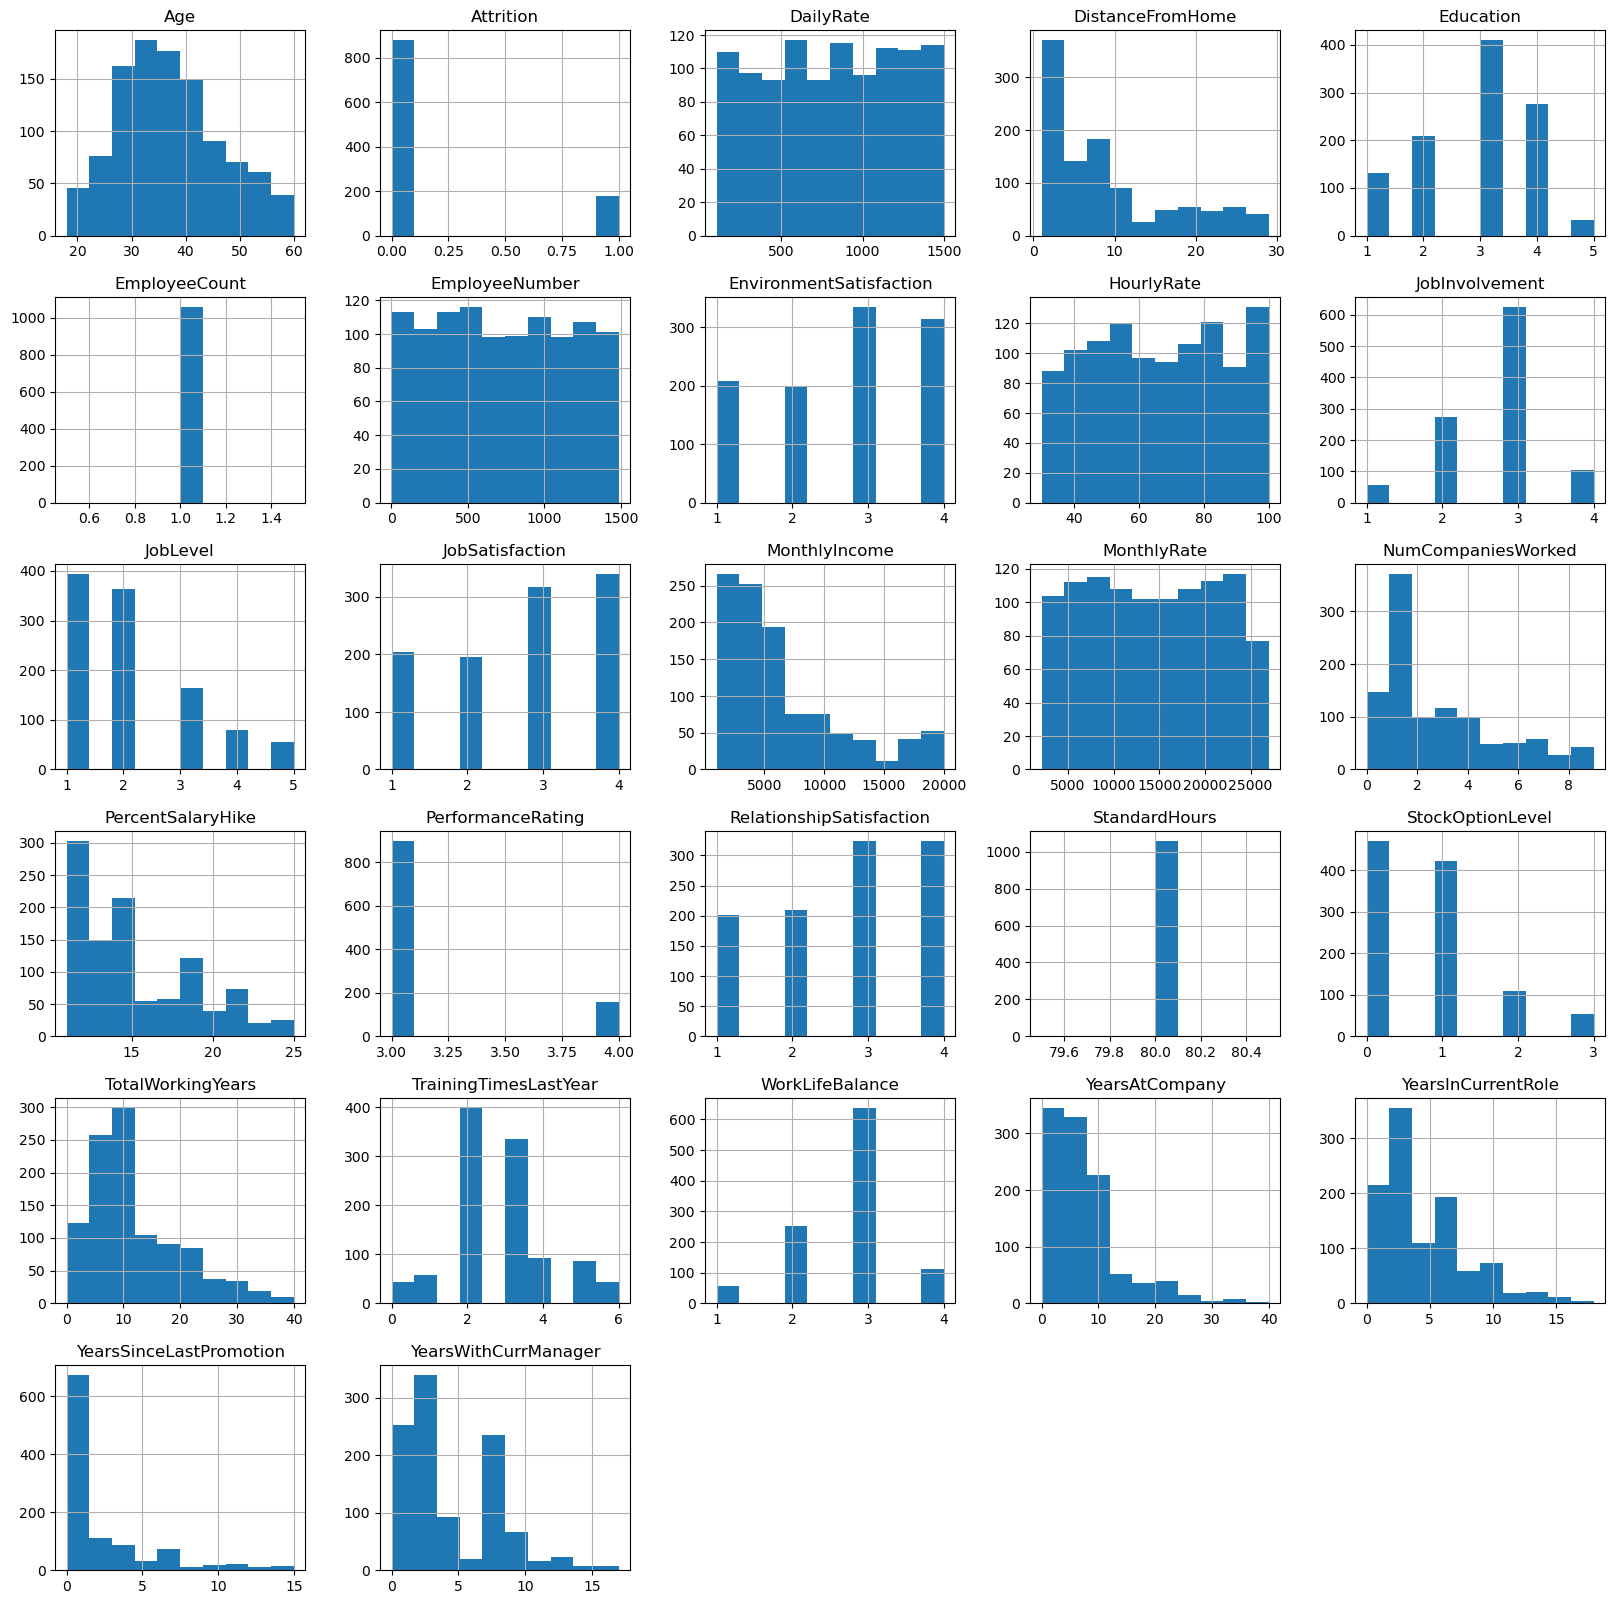

In [8]:
df.hist(figsize=(20,20))
plt.show()

The 'EmployeeCount' is always 1.

The 'EmployeeNumber' is the unique badge number for each individual.

'Over18' is always equal to Yes.

Each employee has the same 'StandardHours'.

#### For these reasons I will be removing these columns.

In [9]:
df = df.drop(['EmployeeCount','EmployeeNumber','Over18', 'StandardHours'], axis=1)

Mapping 'Attrition' to say 'Yes' and 'No'

In [10]:
df['Attrition'] = df['Attrition'].map({ 1: 'Yes', 0 : 'No'})

In [11]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7


In [12]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

## Grouping Columns 

Since we will be working with different types of data, I will split them up into groups based on their data type, this way when it comes time to make charts, I can produce an array of charts based on the data type.

##### Grouping based on variables that have numbers that represent categories. Ordinal Values.

In [13]:
num_but_cat_columns = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'NumCompaniesWorked',  'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
    'WorkLifeBalance'
]

df_num_but_cat = df[num_but_cat_columns]
df_num_but_cat.head(3)

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,2,2,3,2,4,8,3,1,0,0,1
1,1,3,2,2,2,1,4,4,1,3,3
2,2,4,2,1,3,6,3,2,0,3,3


In [14]:
df[num_but_cat_columns] = df[num_but_cat_columns].astype('int')
df_num_but_cat.dtypes

Education                   int64
EnvironmentSatisfaction     int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
NumCompaniesWorked          int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
dtype: object

##### Grouping Category Columns.

In [15]:
cat_columns = ['BusinessTravel','Gender','OverTime', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

df_cat = df[cat_columns]
df_cat.head(3)

,BusinessTravel,Gender,OverTime,Department,EducationField,JobRole,MaritalStatus
0,Travel_Rarely,Female,Yes,Sales,Life Sciences,Sales Executive,Single
1,Travel_Frequently,Male,No,Research & Development,Life Sciences,Research Scientist,Married
2,Travel_Rarely,Male,Yes,Research & Development,Other,Laboratory Technician,Single


In [16]:
df_cat.dtypes

BusinessTravel    object
Gender            object
OverTime          object
Department        object
EducationField    object
JobRole           object
MaritalStatus     object
dtype: object

##### Grouping Integer Columns.

In [17]:
int_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears','YearsSinceLastPromotion', 'YearsWithCurrManager']

df_int = df[int_columns]
df_int.head(3)

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,5993,19479,11,8,0,5
1,49,279,8,61,5130,24907,23,10,1,7
2,37,1373,2,92,2090,2396,15,7,0,0


In [18]:
df_int.dtypes

Age                        int64
DailyRate                  int64
DistanceFromHome           int64
HourlyRate                 int64
MonthlyIncome              int64
MonthlyRate                int64
PercentSalaryHike          int64
TotalWorkingYears          int64
YearsSinceLastPromotion    int64
YearsWithCurrManager       int64
dtype: object

## Data Balance

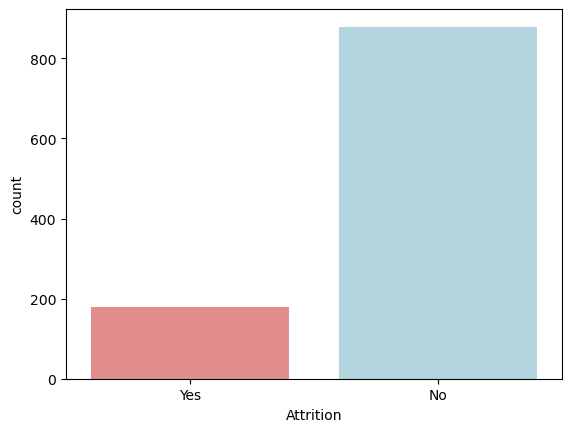

In [19]:
custom_palette = ['lightcoral', 'lightblue']
sns.countplot(data=df, x='Attrition', palette=custom_palette)
plt.show()

In [20]:
# Finding the proportion of both 'Attrition' values
(df['Attrition'].value_counts() / len(df)).round(2)

No     0.83
Yes    0.17
Name: Attrition, dtype: float64

This data is very unbalanced, as we can see roughly 83% is taken up by the current employees while the remaining 17% are the ex-employees. Understanding this will help us interpret the comparisons with less bias.

# Numerical Values Comparison

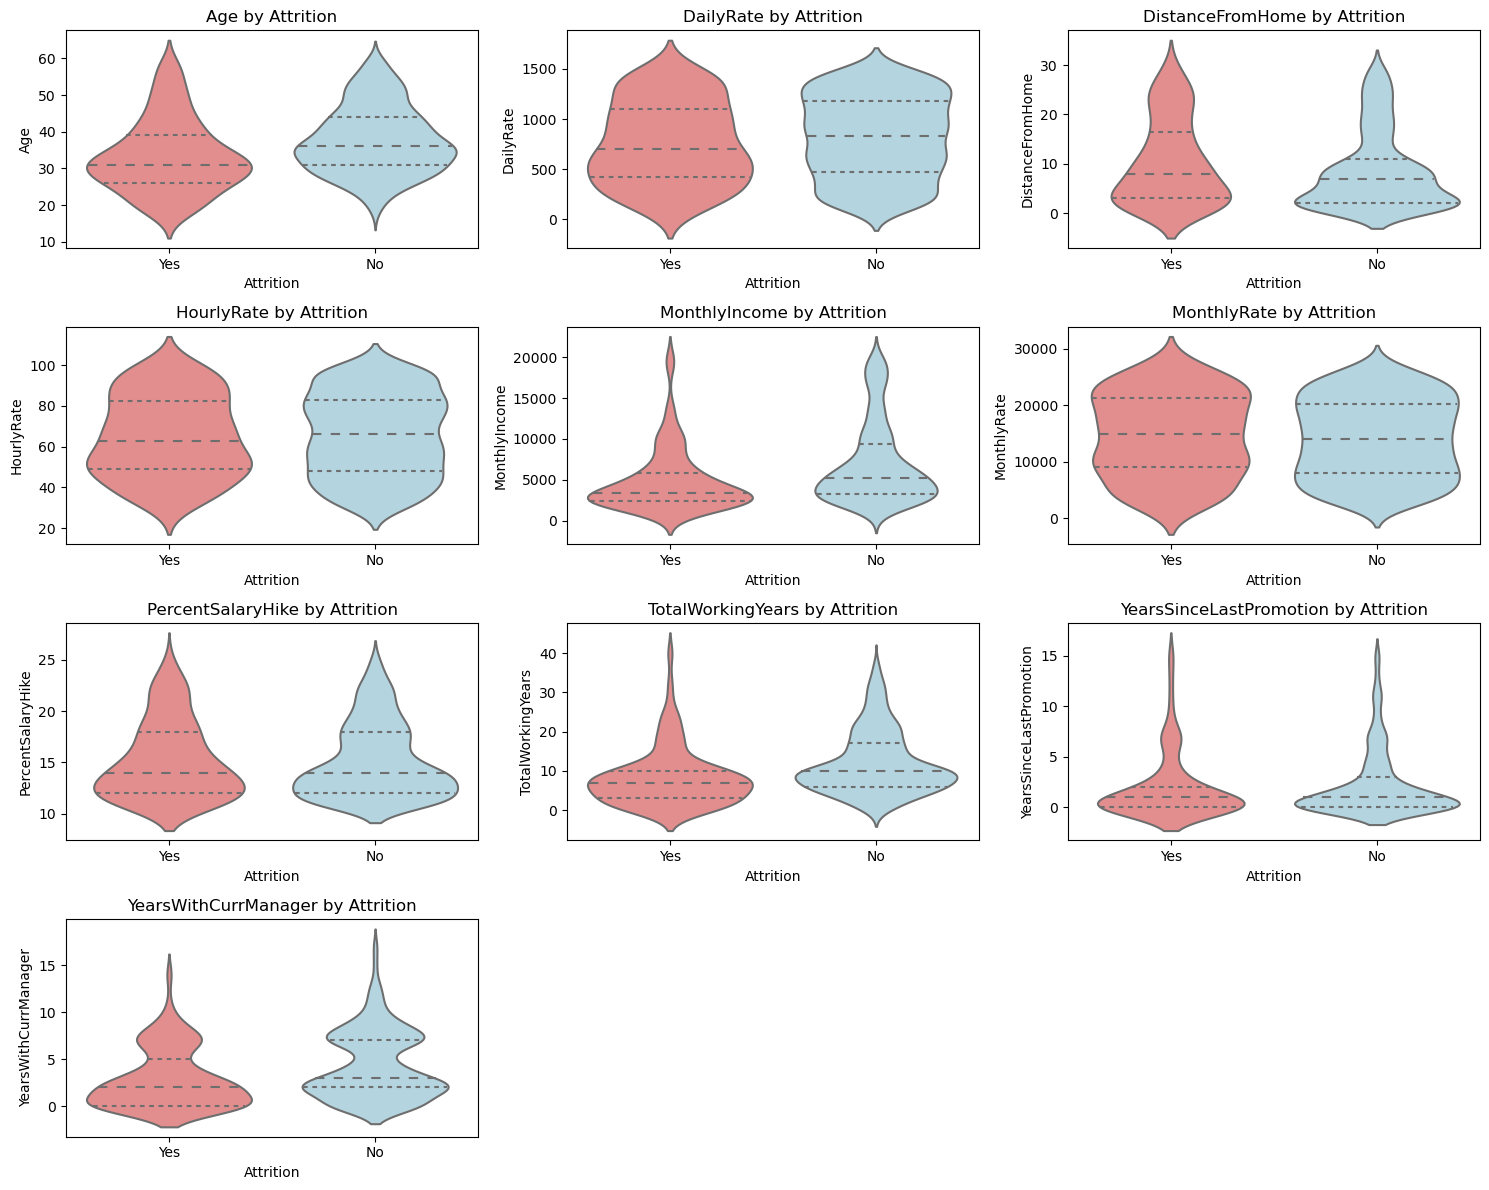

In [21]:
plt.figure(figsize=(15, 12))
for index, column in enumerate(int_columns, 1):
    plt.subplot(4, 3, index)
    sns.violinplot(data=df, x='Attrition', y=column, palette=custom_palette, inner='quartile') 
    plt.title(f'{column} by Attrition')
    
plt.tight_layout()
plt.show()

### Summary of: Numerical Values Comparison

Note: Normally I would use the median for these comparisons since the majority of the categories arent normally distributed, but since we are dealing with unbalanced data (current employees who stay make up 83% while ex-employees make up 17%), I will be taking the mean of each comparison.

#### Age: People who quit tend to be younger.

In [22]:
average_age_stay = df.loc[df['Attrition'] == 'No', 'Age'].mean()
average_age_leave = df.loc[df['Attrition'] == 'Yes', 'Age'].mean()

print("Average Age for Current Employees: {:.0f}".format(average_age_stay))
print("Average Age for Ex-Employees: {:.0f}".format(average_age_leave))

Average Age for Current Employees: 38
Average Age for Ex-Employees: 33


#### Daily Rate: Ex-employees had a lower daily rate.

In [23]:
average_dailyrate_stay = df.loc[df['Attrition'] == 'No', 'DailyRate'].mean()
average_dailyrate_leave = df.loc[df['Attrition'] == 'Yes', 'DailyRate'].mean()

print("Average daily rate for Current Employees: {:.2f}".format(average_dailyrate_stay))
print("Average daily rate for Ex-Employees: {:.2f}".format(average_dailyrate_leave))

Average daily rate for Current Employees: 819.12
Average daily rate for Ex-Employees: 762.50


#### Distance From Home: While most ex-employees have a relatively short distance, ex-employees had a longer trip than current employees.

In [24]:
average_distancefromhome_stay = df.loc[df['Attrition'] == 'No', 'DistanceFromHome'].mean()
average_distancefromhome_leave = df.loc[df['Attrition'] == 'Yes', 'DistanceFromHome'].mean()

print("Average distance from home for Current Employees (in miles): {:.2f}".format(average_distancefromhome_stay))
print("Average distance from home for Ex-Employees (in miles): {:.2f}".format(average_distancefromhome_leave))

Average distance from home for Current Employees (in miles): 8.70
Average distance from home for Ex-Employees (in miles): 10.37


#### Monthly Income: The vast majority of ex-employees had a monthly income of roughly 3000 while current employees make over 5000.

In [25]:
average_monthlyincome_stay = df.loc[df['Attrition'] == 'No', 'MonthlyIncome'].mean()
average_monthlyincome_leave = df.loc[df['Attrition'] == 'Yes', 'MonthlyIncome'].mean()

print("Average monthly income for Current Employees: {:.2f}".format(average_monthlyincome_stay))
print("Average monthly income for Ex-Employees: {:.2f}".format(average_monthlyincome_leave))

Average monthly income for Current Employees: 6982.93
Average monthly income for Ex-Employees: 4872.94


#### Total Working Years: Ex-employees tend to have worked less than current employees, which makes sense because as stated above, younger people tend to be the ones who quit.

In [26]:
average_totalworkingyears_stay = df.loc[df['Attrition'] == 'No', 'TotalWorkingYears'].mean()
average_totalworkingyears_leave = df.loc[df['Attrition'] == 'Yes', 'TotalWorkingYears'].mean()

print("Average total working years for Current Employees: {:.0f}".format(average_totalworkingyears_stay))
print("Average total working years for Ex-Employees: {:.0f}".format(average_totalworkingyears_leave))

Average total working years for Current Employees: 12
Average total working years for Ex-Employees: 8


#### Years With Current Manager: Most ex-employees leave within the first few years of a new manager.

In [27]:
average_yearswithcurrmanager_stay = df.loc[df['Attrition'] == 'No', 'YearsWithCurrManager'].mean()
average_yearswithcurrmanager_leave = df.loc[df['Attrition'] == 'Yes', 'YearsWithCurrManager'].mean()

print("Average years with current manager for Current Employees: {:.0f}".format(average_yearswithcurrmanager_stay))
print("Average years with current manager for Ex-Employees: {:.0f}".format(average_yearswithcurrmanager_leave))

Average years with current manager for Current Employees: 4
Average years with current manager for Ex-Employees: 3


## Ordinal Values Comparison

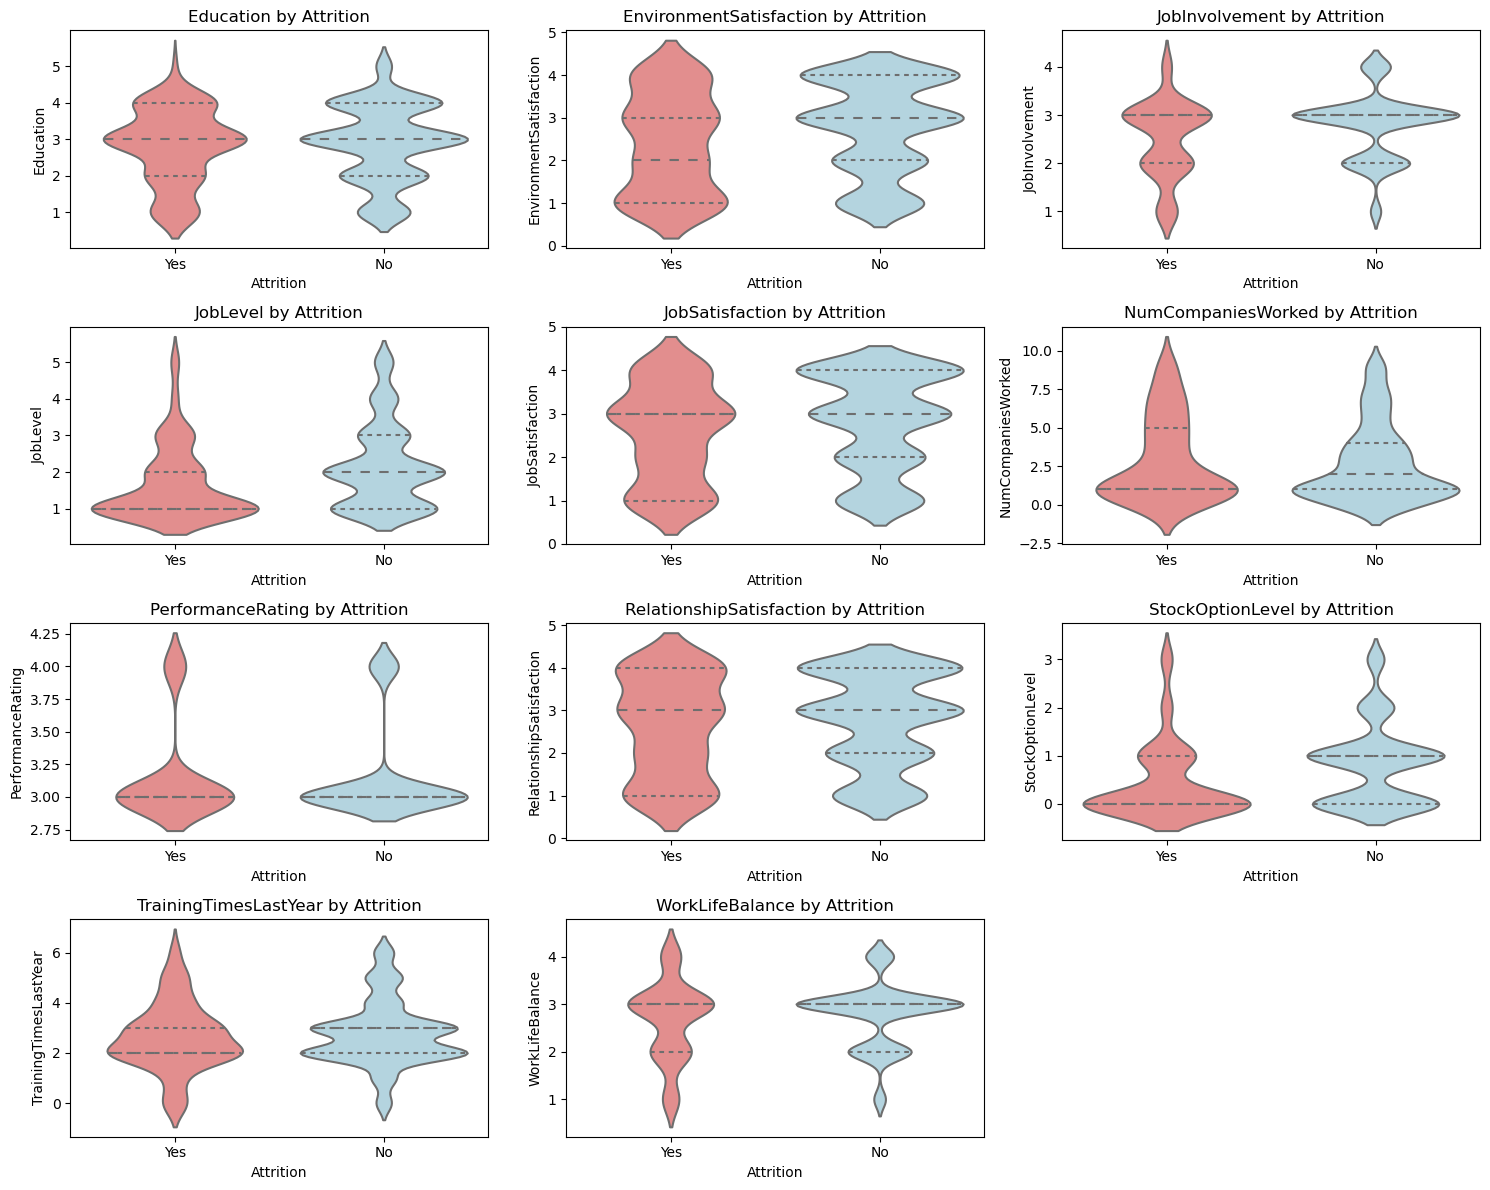

In [28]:
plt.figure(figsize=(15, 12))
for index, column in enumerate(num_but_cat_columns, 1):
    plt.subplot(4, 3, index)
    sns.violinplot(data=df, x='Attrition', y=column, palette=custom_palette, inner='quartile') 
    plt.title(f'{column} by Attrition')
    
plt.tight_layout()
plt.show()

##### Number Legend

Education: 1.'Below College' 2.'College' 3.'Bachelor' 4.'Master' 5.'Doctor'

Job Involvement: 1.'Low' 2.'Medium' 3.'High' 4.'Very High'

Job Satisfaction: 1.'Low' 2.'Medium' 3.'High' 4.'Very High'

Performance Rating: 1.'Low' 2.'Good' 3.'Excellent' 4.'Outstanding'

Work Life Balance: 1.'Bad 2.'Good' 3.'Better' 4.'Best

Enviroment Satisfaction: 1.'Low' 2.'Medium' 3.'High' 4.'Very High'

Relationship Satisfaction: 1.'Low' 2.'Medium' 3.'High' 4.'Very High'

### Summary of: Ordinal Values Comparison

#### Education: Both ex-employees and current employees have a bachelor degree, but current employees tend to be more diverse in their studies.

In [29]:
average_education_stay = df.loc[df['Attrition'] == 'No', 'Education'].mean()
average_education_leave = df.loc[df['Attrition'] == 'Yes', 'Education'].mean()

print("Average education for Current Employees: {:.2f}".format(average_education_stay))
print("Average education for Ex-Employees: {:.2f}".format(average_education_leave))

Average education for Current Employees: 2.89
Average education for Ex-Employees: 2.80


#### Job Level: Most ex-employees tend leave at a job level of 1. While current employees are at least at a job level 2.

In [30]:
average_joblevel_stay = df.loc[df['Attrition'] == 'No', 'JobLevel'].mean()
average_joblevel_leave = df.loc[df['Attrition'] == 'Yes', 'JobLevel'].mean()

print("Average job level for Current Employees: {:.2f}".format(average_joblevel_stay))
print("Average job level for Ex-Employees: {:.2f}".format(average_joblevel_leave))

Average job level for Current Employees: 2.18
Average job level for Ex-Employees: 1.66


#### Performance Rating: Both ex-employees and current employees had a performance rating of 3. In this data the performance rating only has a 3 and 4. This would be a good talking point as to why we should implement a different way to gauge performance. With the vast majority of people at a performance rating of 3, this doesn’t give us too much insight.

In [31]:
average_performancerating_stay = df.loc[df['Attrition'] == 'No', 'PerformanceRating'].mean()
average_performancerating_leave = df.loc[df['Attrition'] == 'Yes', 'PerformanceRating'].mean()

print("Average performance rating for Current Employees: {:.2f}".format(average_performancerating_stay))
print("Average performance rating for Ex-Employees: {:.2f}".format(average_performancerating_leave))

Average performance rating for Current Employees: 3.15
Average performance rating for Ex-Employees: 3.16


#### Training Times Last Year: Both ex-employees and current employees have 2 to 3 training sessions per year.

In [32]:
average_trainingtimes_stay = df.loc[df['Attrition'] == 'No', 'TrainingTimesLastYear'].mean()
average_trainingtimes_leave = df.loc[df['Attrition'] == 'Yes', 'TrainingTimesLastYear'].mean()

print("Average training times last year for Current Employees: {:.2f}".format(average_trainingtimes_stay))
print("Average training times last year for Ex-Employees: {:.2f}".format(average_trainingtimes_leave))

Average training times last year for Current Employees: 2.80
Average training times last year for Ex-Employees: 2.63


#### Environment Satisfaction: Ex-employees and current employees both rate their environment around a 2 to 3.

In [33]:
average_environmentsatisfaction_stay = df.loc[df['Attrition'] == 'No', 'EnvironmentSatisfaction'].mean()
average_environmentsatisfaction_leave = df.loc[df['Attrition'] == 'Yes', 'EnvironmentSatisfaction'].mean()

print("Average environment satisfaction for Current Employees: {:.2f}".format(average_environmentsatisfaction_stay))
print("Average environment satisfaction for Ex-Employees: {:.2f}".format(average_environmentsatisfaction_leave))

Average environment satisfaction for Current Employees: 2.78
Average environment satisfaction for Ex-Employees: 2.39


#### Job Satisfaction: Ex-employees tend to rank their job satisfaction at a 3 while current employees rate it a 5.

In [34]:
average_jobsatisfaction_stay = df.loc[df['Attrition'] == 'No', 'JobSatisfaction'].mean()
average_jobsatisfaction_leave = df.loc[df['Attrition'] == 'Yes', 'JobSatisfaction'].mean()

print("Average job satisfaction for Current Employees: {:.2f}".format(average_jobsatisfaction_stay))
print("Average job satisfaction for Ex-Employees: {:.2f}".format(average_jobsatisfaction_leave))

Average job satisfaction for Current Employees: 2.80
Average job satisfaction for Ex-Employees: 2.53


#### Relationship Satisfaction: Both ex-employees and current employees tend to rank their relationship satisfaction at a 3.

In [35]:
average_relationshipsatisfaction_stay = df.loc[df['Attrition'] == 'No', 'RelationshipSatisfaction'].mean()
average_relationshipsatisfaction_leave = df.loc[df['Attrition'] == 'Yes', 'RelationshipSatisfaction'].mean()

print("Average relationship satisfaction for Current Employees: {:.2f}".format(average_relationshipsatisfaction_stay))
print("Average relationship satisfaction for Ex-Employees: {:.2f}".format(average_relationshipsatisfaction_leave))

Average relationship satisfaction for Current Employees: 2.75
Average relationship satisfaction for Ex-Employees: 2.60


#### Work Life Balance: Both ex-employees and current employees rank this a 3.

In [36]:
average_worklifebalance_stay = df.loc[df['Attrition'] == 'No', 'WorkLifeBalance'].mean()
average_worklifebalance_leave = df.loc[df['Attrition'] == 'Yes', 'WorkLifeBalance'].mean()

print("Average work life balance for Current Employees: {:.2f}".format(average_worklifebalance_stay))
print("Average work life balance for Ex-Employees: {:.2f}".format(average_worklifebalance_leave))

Average work life balance for Current Employees: 2.78
Average work life balance for Ex-Employees: 2.67


#### Job Involvement: Both ex-employees and current employees rank this around 3.

In [37]:
average_jobinvolvement_stay = df.loc[df['Attrition'] == 'No', 'JobInvolvement'].mean()
average_jobinvolvement_leave = df.loc[df['Attrition'] == 'Yes', 'JobInvolvement'].mean()

print("Average job involvement for Current Employees: {:.2f}".format(average_jobinvolvement_stay))
print("Average job involvement for Ex-Employees: {:.2f}".format(average_jobinvolvement_leave))

Average job involvement for Current Employees: 2.78
Average job involvement for Ex-Employees: 2.50


#### Number of Companies Worked: This seems to the first job for both ex-employees and current employees.

In [38]:
average_numcompaniesworked_stay = df.loc[df['Attrition'] == 'No', 'NumCompaniesWorked'].mean()
average_numcompaniesworked_leave = df.loc[df['Attrition'] == 'Yes', 'NumCompaniesWorked'].mean()

print("Average 'number of companies worked' for Current Employees: {:.2f}".format(average_numcompaniesworked_stay))
print("Average 'number of companies worked' for Ex-Employees: {:.2f}".format(average_numcompaniesworked_leave))

Average 'number of companies worked' for Current Employees: 2.66
Average 'number of companies worked' for Ex-Employees: 2.92


#### Stock Option Level: Ex-employees tend to have no stock option while most of current employees have at least a stock option level 1.

In [39]:
average_stockoptionlevel_stay = df.loc[df['Attrition'] == 'No', 'StockOptionLevel'].mean()
average_stockoptionlevel_leave = df.loc[df['Attrition'] == 'Yes', 'StockOptionLevel'].mean()

print("Average stock option level for Current Employees: {:.2f}".format(average_stockoptionlevel_stay))
print("Average stock option level for Ex-Employees: {:.2f}".format(average_stockoptionlevel_leave))

Average stock option level for Current Employees: 0.82
Average stock option level for Ex-Employees: 0.46


## Categorical Values Comparison

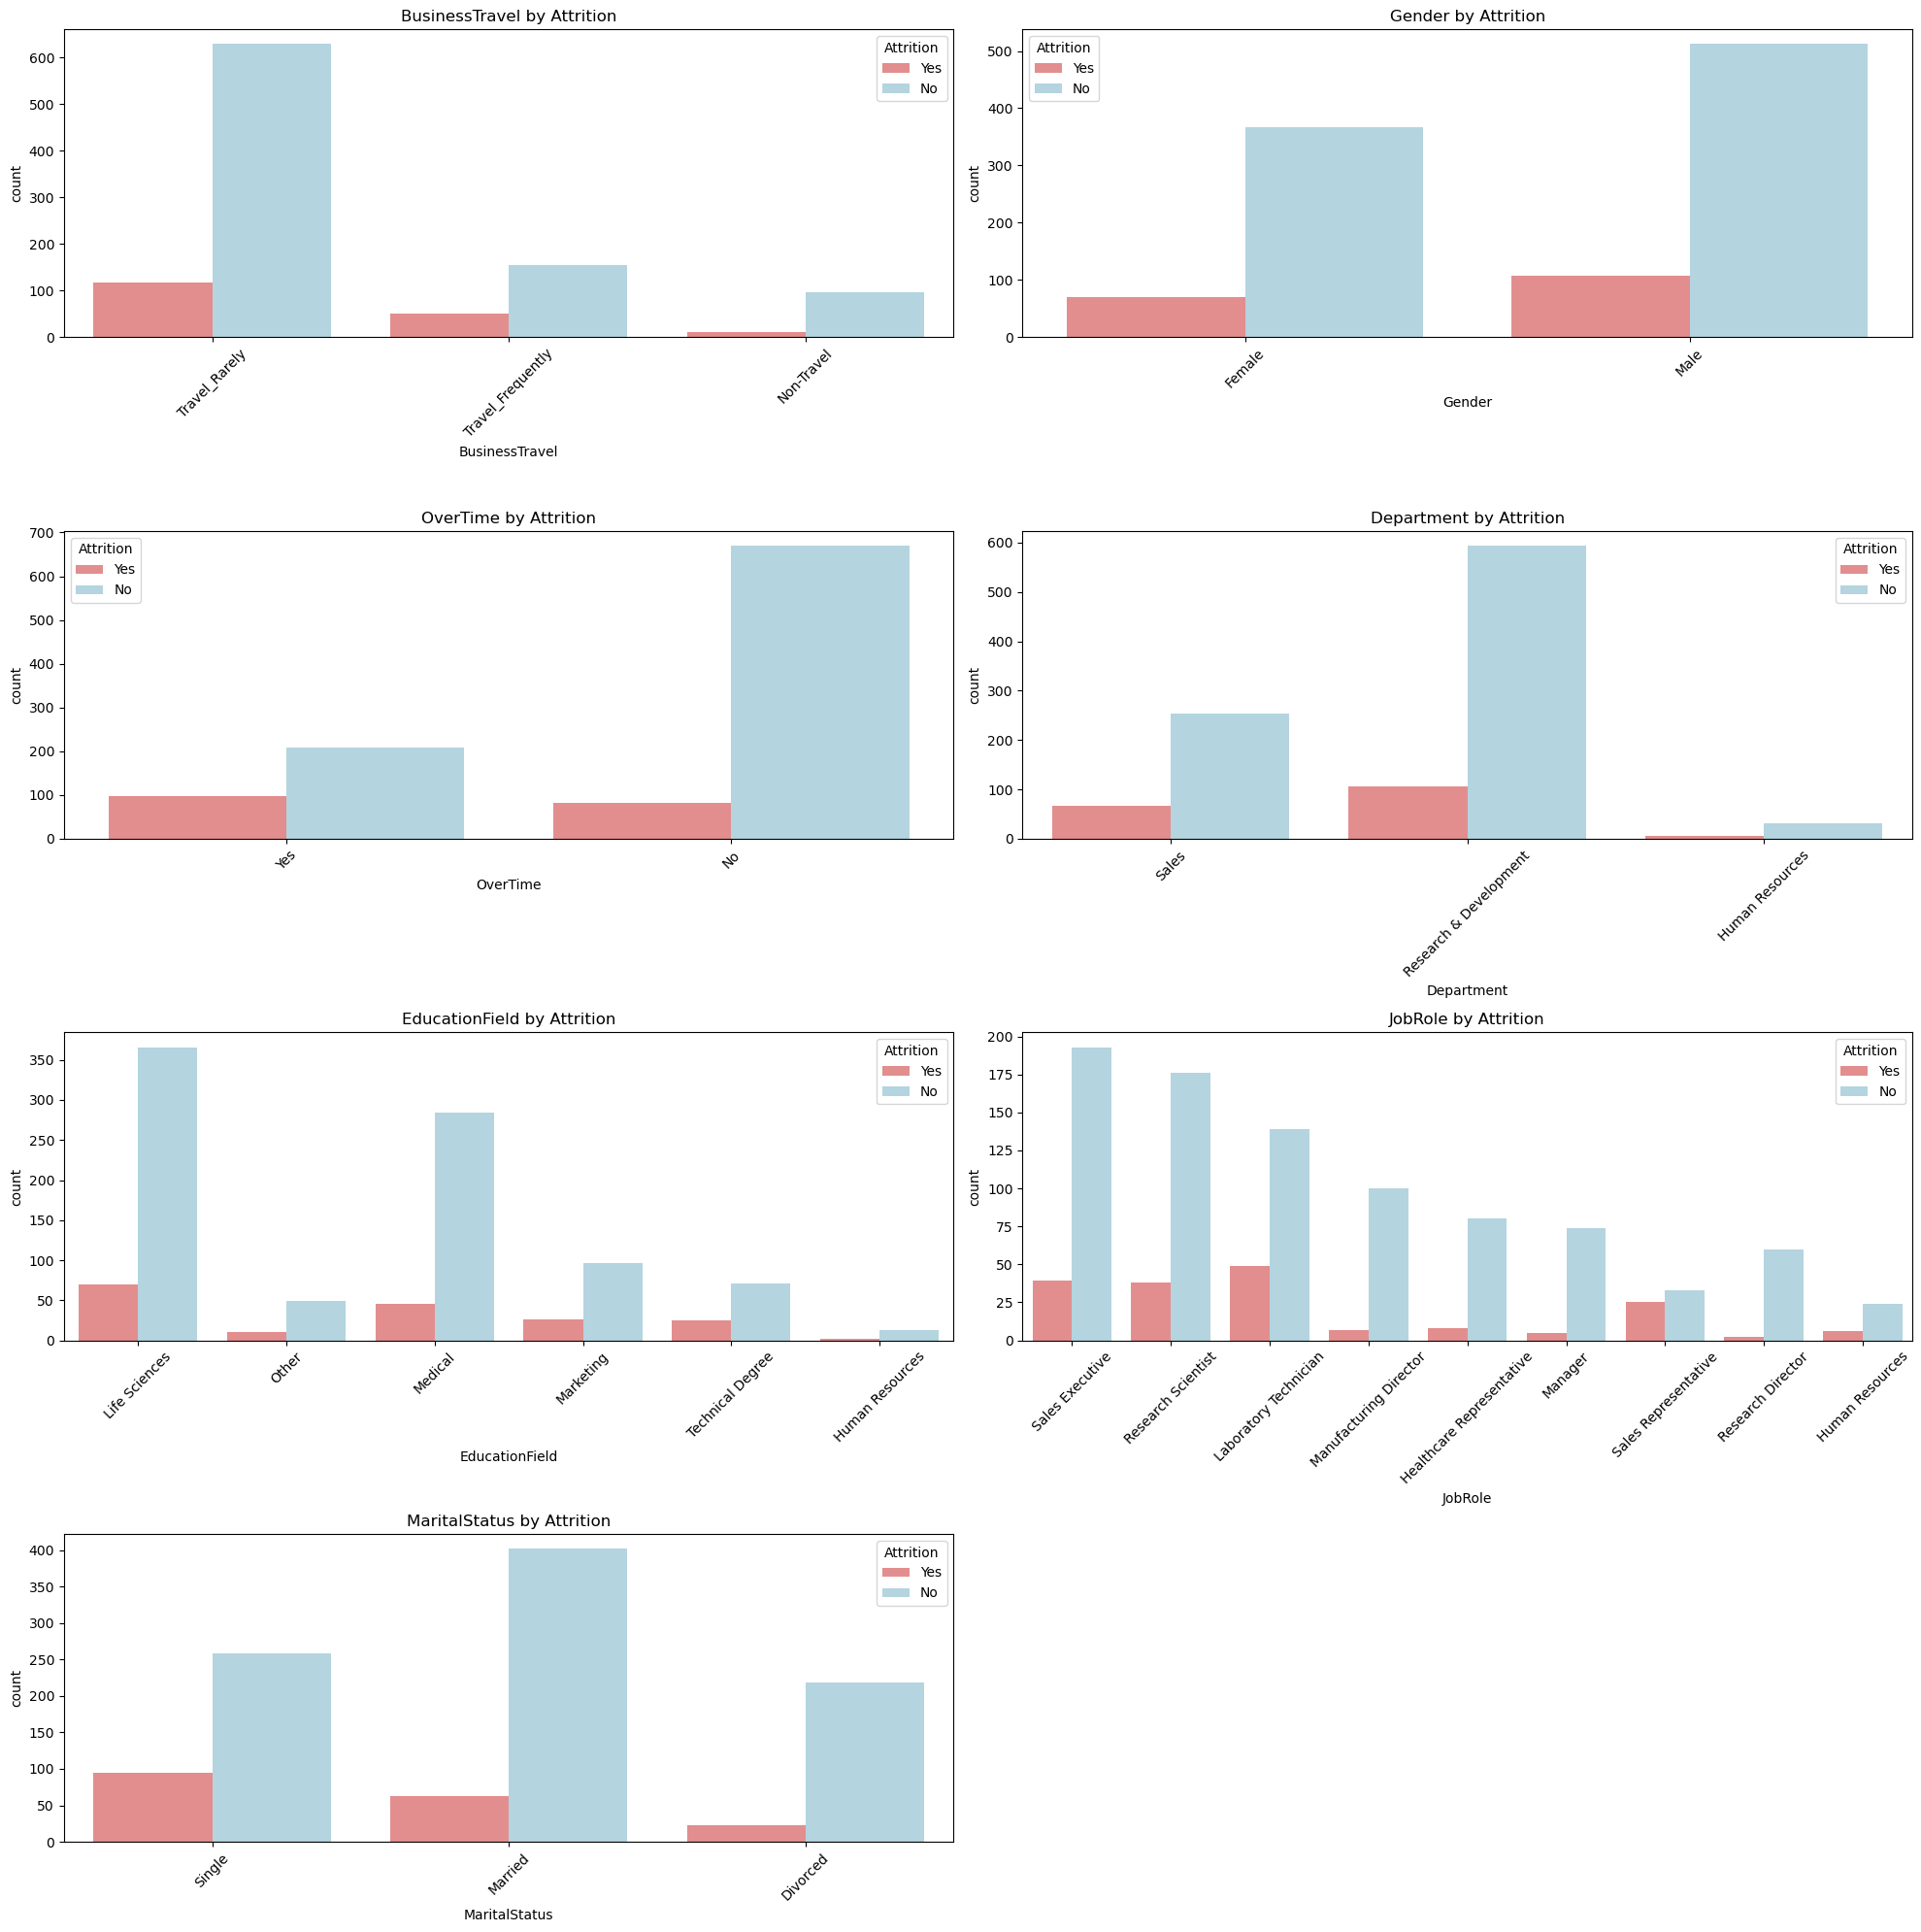

In [40]:
plt.figure(figsize=(20, 20))
for index, column in enumerate(cat_columns, 1):
    plt.subplot(4, 2, index)
    sns.countplot(data=df, x=column, hue='Attrition', palette=custom_palette)
    plt.title(f'{column} by Attrition')
    ax = plt.gca() 
    ax.legend(title='Attrition', labels=['Yes', 'No']) 
    
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

### Summary of: Categorical Values Comparison

**Business Travel**: While most of ex-employees traveled rarely, a bigger proportion of them traveled frequently.

**Gender**: Ex-employees tend to be male, but not by much.

**Overtime**: Proportion wise, ex-employees tend to have overtime.

**Education Field**: While life sciences have the greatest number of ex-employees, marketing and technical degrees are the bigger proportion for the field.

**Marital Status**: More ex-employees tend to be single.

**Department**: While ex-employees tend to be in research and development, the bigger percentage of the sales department is made from ex-employees.

**Job Role**: Ex-employees tend to be a laboratory technician. But sales reps take up a massive percentage, breaking down the categories like this helps up drill down to what department really needs help.

These were just some brief descriptions of what story each chart was telling; our next steps will be listed in the summary section of this analysis.

## Encoded Variables Comparison

In [41]:
# Changing 'Attrition' back to a number
df['Attrition'] = df['Attrition'].map({ 'Yes': 1, 'No' : 0})

## Encoding dummy variables

In order to correctly correlate the values, we need to perform one hot encoding.

In [42]:
encoded_df = pd.get_dummies(df, columns=cat_columns, prefix=cat_columns)
final_df = pd.concat([df[int_columns + num_but_cat_columns], encoded_df], axis=1)
final_df.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsSinceLastPromotion,YearsWithCurrManager,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Female,Gender_Male,OverTime_No,OverTime_Yes,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,94,5993,19479,11,8,0,5,2,2,3,2,4,8,3,1,0,0,1,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,279,8,61,5130,24907,23,10,1,7,1,3,2,2,2,1,4,4,1,3,3,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,92,2090,2396,15,7,0,0,2,4,2,1,3,6,3,2,0,3,3,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,56,2909,23159,11,8,3,0,4,4,3,1,3,1,3,3,0,3,3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,591,2,40,3468,16632,12,6,2,2,1,1,3,1,2,9,3,4,1,3,3,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


When concatenating the 2 lists and variable there must have been some overlap, I’ll make a formula to only keep the first instance of a column, this way we will not unknowingly remove any encoded variables.

In [43]:
duplicated_columns = final_df.columns[final_df.T.duplicated()]
duplicated_columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [44]:
# Removing duplicates
final_df = final_df.loc[:, ~final_df.columns.duplicated(keep='first')]
final_df.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsSinceLastPromotion,YearsWithCurrManager,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,Attrition,YearsAtCompany,YearsInCurrentRole,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Female,Gender_Male,OverTime_No,OverTime_Yes,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,94,5993,19479,11,8,0,5,2,2,3,2,4,8,3,1,0,0,1,1,6,4,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,279,8,61,5130,24907,23,10,1,7,1,3,2,2,2,1,4,4,1,3,3,0,10,7,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,92,2090,2396,15,7,0,0,2,4,2,1,3,6,3,2,0,3,3,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,56,2909,23159,11,8,3,0,4,4,3,1,3,1,3,3,0,3,3,0,8,7,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,591,2,40,3468,16632,12,6,2,2,1,1,3,1,2,9,3,4,1,3,3,0,2,2,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


Now to make sure all the data types are int64.

In [45]:
final_df.dtypes

Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
HourlyRate                           int64
MonthlyIncome                        int64
MonthlyRate                          int64
PercentSalaryHike                    int64
TotalWorkingYears                    int64
YearsSinceLastPromotion              int64
YearsWithCurrManager                 int64
Education                            int64
EnvironmentSatisfaction              int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
NumCompaniesWorked                   int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
Attrition                            int64
YearsAtCompany                       int64
YearsInCurr

In [46]:
# Changing dtypes to 'int64'
final_df = final_df.astype('int64')
final_df.dtypes

Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
HourlyRate                           int64
MonthlyIncome                        int64
MonthlyRate                          int64
PercentSalaryHike                    int64
TotalWorkingYears                    int64
YearsSinceLastPromotion              int64
YearsWithCurrManager                 int64
Education                            int64
EnvironmentSatisfaction              int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
NumCompaniesWorked                   int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
Attrition                            int64
YearsAtCompany                       int64
YearsInCurr

## Attrition Correlation

By checking how other variables correlate with 'Attrition', we can see what exactly could potentially be causing employees to leave.

In [47]:
final_df.corr()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsSinceLastPromotion,YearsWithCurrManager,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,Attrition,YearsAtCompany,YearsInCurrentRole,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Female,Gender_Male,OverTime_No,OverTime_Yes,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,0.010507,-0.022753,0.005901,0.497392,0.019262,-0.024856,0.690428,0.211967,0.194128,0.180723,0.029247,0.044010,0.506484,-0.020598,0.303624,-0.033426,0.052445,0.010683,-0.004970,-0.026016,-0.172067,0.313454,0.210148,-0.029651,-0.016635,0.034025,0.030312,-0.030312,-0.032743,0.032743,0.048537,0.010607,-0.030609,0.022238,-0.005985,0.045052,0.009240,-0.025088,-0.043854,0.093189,-0.004645,-0.147077,0.290002,0.048337,0.174359,-0.145827,-0.008242,-0.169179,0.020696,0.075764,-0.098237
DailyRate,0.010507,1.000000,0.027120,0.038572,0.008371,-0.040267,0.031179,0.024266,-0.047469,-0.038338,-0.039805,0.023005,0.058871,0.003042,0.026694,0.028158,0.016809,-0.013600,0.044321,-0.000817,-0.057479,-0.051992,-0.047141,-0.001487,0.009229,-0.021807,0.012800,0.038867,-0.038867,-0.004170,0.004170,-0.012697,0.036728,-0.032694,-0.036934,0.017522,-0.072119,0.047522,-0.033706,0.015651,0.054250,-0.003016,-0.004463,0.011688,0.011210,-0.007625,-0.005539,-0.037100,0.000616,0.019890,0.053541,-0.074115
DistanceFromHome,-0.022753,0.027120,1.000000,0.048494,-0.042127,0.027495,0.041835,-0.025465,-0.009304,-0.005352,0.006185,-0.020197,0.051250,-0.024838,0.003862,-0.018545,0.030428,0.010755,0.048544,-0.005176,-0.051469,0.078074,-0.028687,-0.005367,0.043424,0.039115,-0.062616,0.000363,-0.000363,-0.038268,0.038268,-0.022230,0.002049,0.006903,-0.020566,-0.037159,0.024542,0.057416,-0.019331,-0.032310,0.036589,-0.020085,0.011103,-0.053369,0.006368,-0.049397,0.017172,0.019056,-0.009165,0.008473,0.013293,-0.021552
HourlyRate,0.005901,0.038572,0.048494,1.000000,-0.014148,-0.026110,-0.006855,-0.017238,-0.049503,-0.031806,0.026237,-0.064578,0.047156,-0.021084,-0.073877,0.030150,-0.011632,-0.012714,0.021539,-0.017006,-0.001058,-0.017524,-0.022893,-0.035471,-0.005073,-0.020241,0.020898,0.007658,-0.007658,0.012056,-0.012056,-0.032618,0.012968,-0.000135,-0.071882,0.032361,0.008226,-0.019524,-0.036896,0.025950,0.039316,-0.031480,-0.003044,0.008169,-0.035626,-0.021375,0.041495,-0.018816,0.001158,-0.017808,0.023847,-0.009239
MonthlyIncome,0.497392,0.008371,-0.042127,-0.014148,1.000000,0.016802,-0.060257,0.778177,0.354188,0.347605,0.092533,0.001543,-0.007966,0.953964,-0.030743,0.147337,-0.058225,0.030892,0.012255,0.001079,0.025149,-0.163600,0.527952,0.386686,-0.006169,-0.028191,0.028514,0.022813,-0.022813,0.001231,-0.001231,0.030103,-0.064809,0.054568,0.062303,-0.024045,0.053921,0.005068,-0.017272,-0.038774,0.071247,-0.072518,-0.325450,0.617649,0.056332,0.489656,-0.361694,0.031988,-0.199998,0.040029,0.057665,-0.096410
MonthlyRate,0.019262,-0.040267,0.027495,-0.026110,0.016802,1.000000,-0.015426,0.021230,-0.023109,-0.024255,-0.050810,0.026038,-0.015792,0.024555,0.015769,-0.001055,-0.016981,-0.010896,-0.024654,0.016398,-0.025895,0.023299,-0.032481,-0.017107,0.033624,-0.009360,-0.014120,0.034170,-0.034170,0.007457,-0.007457,0.011545,-0.021822,0.017803,0.019778,0.017718,-0.018445,0.006861,-0.051369,0.011979,-0.019222,0.015931,

In [48]:
final_df.shape

(1058, 52)

Since this data frame will be too big for a correlation matrix, the better approach will be to make a bar chart that will rank the correlations from highest to smallest.

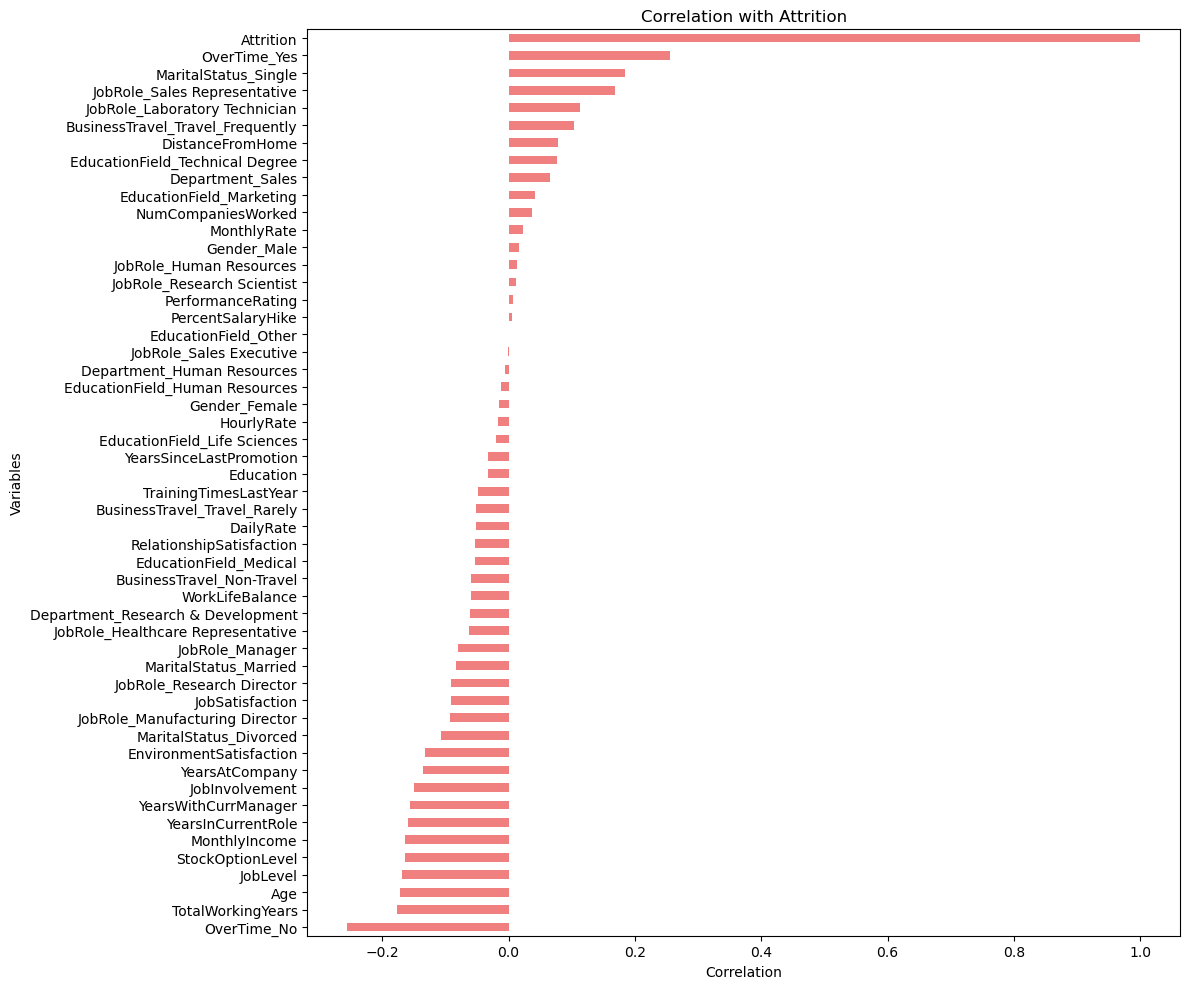

In [49]:
correlations = final_df.corr()
attrition_correlations = correlations['Attrition']
sorted_attrition_correlations = attrition_correlations.sort_values()

plt.figure(figsize=(12, 10))  

ax = sorted_attrition_correlations.plot(kind='barh', color='lightcoral')
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.title('Correlation with Attrition')


plt.subplots_adjust(left=0.2)  

plt.tight_layout()  
plt.show()

In [50]:
top_5_correlations = sorted_attrition_correlations[::-1].head(5)
print(top_5_correlations)

Attrition                        1.000000
OverTime_Yes                     0.255856
MaritalStatus_Single             0.184303
JobRole_Sales Representative     0.168200
JobRole_Laboratory Technician    0.113390
Name: Attrition, dtype: float64


In [51]:
bottom_5_correlations = sorted_attrition_correlations.head(5)
print(bottom_5_correlations)

OverTime_No         -0.255856
TotalWorkingYears   -0.177137
Age                 -0.172067
JobLevel            -0.169201
StockOptionLevel    -0.164228
Name: Attrition, dtype: float64


Looking back at the summaries written for each chart, it’s not surprising that, having overtime, being single, and being in either a sales representative or laboratory technician position plays a big role in Attrition. But what should put up some red flags is how low these coefficients are, with overtime being correlated the highest, the coefficient is only roughly 25%. So how can we make a confident decision based on low correlation coefficients? Let’s bring in a category that can help us determine that.

## 'YearsAtCompamy' Correlation

By checking the correlation for 'YearsAtCompany' , we can get a better idea as to what makes people want to stay at this company. Focusing on what determines people length of working year can give us a better idea on what our plan of action could be.

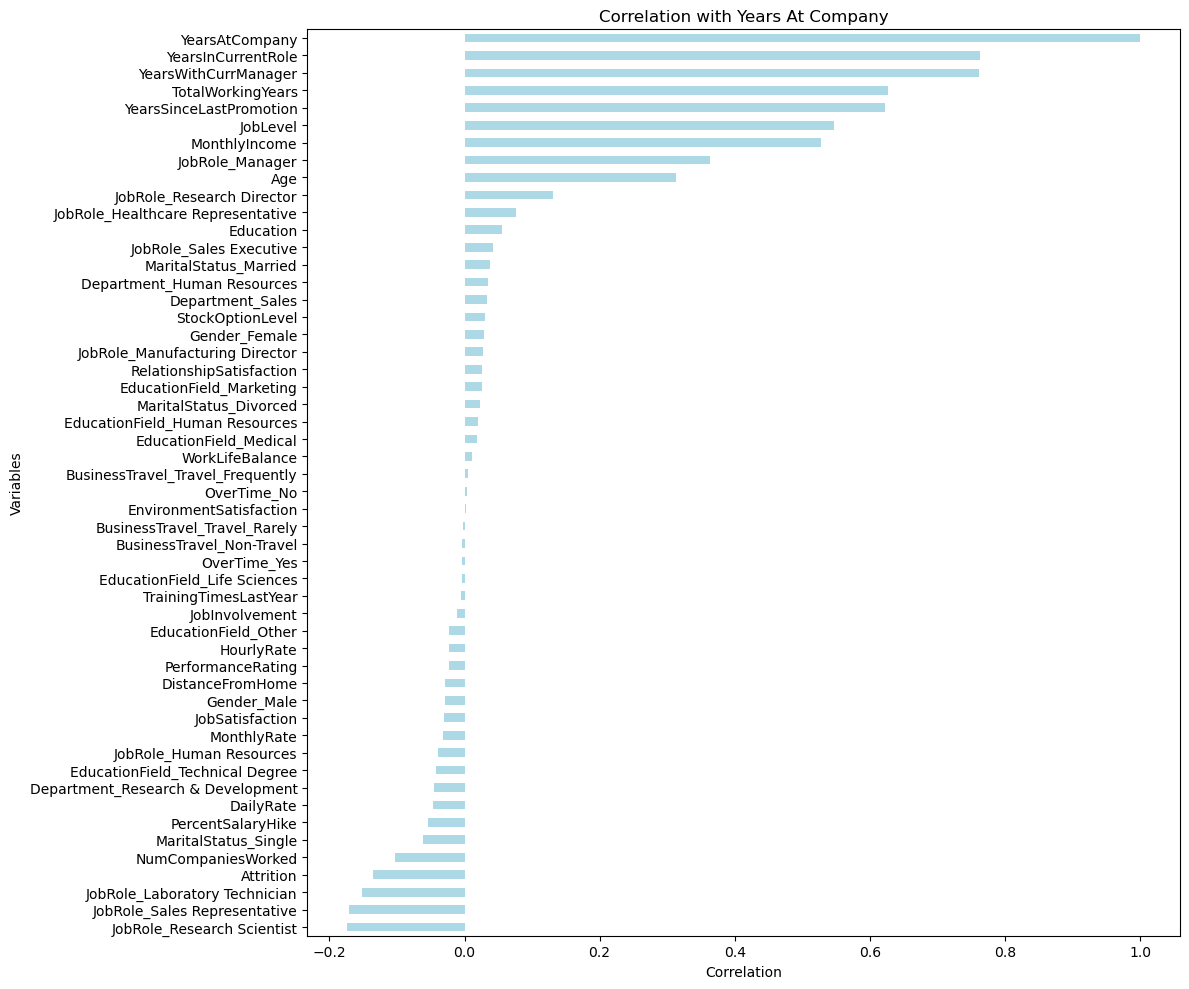

In [52]:
correlations = final_df.corr()
YearsAtCompany_correlations = correlations['YearsAtCompany']
sorted_YearsAtCompany_correlations = YearsAtCompany_correlations.sort_values()

plt.figure(figsize=(12, 10))  

ax = sorted_YearsAtCompany_correlations.plot(kind='barh', color='lightblue')
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.title('Correlation with Years At Company')


plt.subplots_adjust(left=0.2)  

plt.tight_layout()  
plt.show()

In [53]:
top_5_YAC_correlations = sorted_YearsAtCompany_correlations[::-1].head(5)
print(top_5_YAC_correlations)

YearsAtCompany             1.000000
YearsInCurrentRole         0.763479
YearsWithCurrManager       0.761897
TotalWorkingYears          0.627359
YearsSinceLastPromotion    0.622744
Name: YearsAtCompany, dtype: float64


In [54]:
bottom_5_YAC_correlations = sorted_YearsAtCompany_correlations.head(5)
print(bottom_5_YAC_correlations)

JobRole_Research Scientist      -0.173952
JobRole_Sales Representative    -0.170926
JobRole_Laboratory Technician   -0.151725
Attrition                       -0.135134
NumCompaniesWorked              -0.103149
Name: YearsAtCompany, dtype: float64


These coefficients can give us much more confidence than the previous ones. We can see 'YearsInCurrentRole', 'YearsWithCurrManager', and 'TotalWorkingYears' play a noticeable part in whether people stay or leave. 'YearsSinceLastPromotion' makes sense as well. If people dont feel appreciated, they are not as committed to a company, and vice versa. When they feel appreciated, they want to stay and work hard to reciprocate the feeling.

Now look at the bottom 5 coefficients, the ones that stick out are the sales representative and laboratory technician. The same ones that had a light positive correlation with 'Attrition'.

# Findings

### Next Steps / Plan

Before I talk about the findings, I want to clarify that in no way does this mean these variables are the reason people are leaving or staying. As we know, correlation does not equal causation. 
Throughout this analysis we learned that people who are young and new to the job force aren’t quite as reliable as the ones who have worked most of their life. Taking that into consideration, these employees also get paid less. Being that the ex-employees tend to be relatively young, it would make sense that they also fall into the 'single' category as well. From the 'Department' and 'JobRole' categories, 'Sales' and 'SalesRepersenitive' have the largest proportion of ex-employees, and since sales is a commission-based position, lots of stress can come with that.

When looking at the 'YearsAtCompany' correlation it helped us understand why the employee would want to stay or leave. In short, if people dont feel appreciated, they are more than willing to leave. When people go years without promotions, have a manager that doesn’t help employees, and on top of that, have a stressful job, employees happiness and sentiment of the company will go down overtime.
But on the opposite end, since 'YearsAtCompany' correlates so well with those other categories, it shows just how well the right role and manager has positively affected the current employees.

### 1. Measuring satisfaction ratings

Most of the ratings, such as, environment, job, and relationship, on average tended to be 3 or 4. Implementing a system, such as, having a 1 out of 10 scale could help improve the accuracy of these ratings. When a rating goes below a certain threshold, we can talk to the employee about why they picked a certain number. Based on the responses we can notice patterns in the language and move forward accordingly. For example, let’s say rate a 3, it turns out they dont like their current manager, since that plays such a huge part in the time spent at the company, we can dig deeper and see what exactly is going on and why they dont like them. If they give a valid reason, we can put them on a different team with a new manager and see how well they fit in there.

### 2. Sales Staff Training & Support

In [55]:
departments = ['Sales', 'Human Resources', 'Research & Development']

department_stats = df[df['Department'].isin(departments)].groupby('Department').agg(Average_training_times=('TrainingTimesLastYear', 'mean'),Number_of_employees=('Department', 'size')).round(2)

print(department_stats)

                        Average_training_times  Number_of_employees
Department                                                         
Human Resources                           2.61                   38
Research & Development                    2.76                  701
Sales                                     2.82                  319


With the biggest proportion of ex-employees being sales representatives, we need to understand if this is just because sales is known for high turnover, or if this is something on our end. In the code above you notice that the sales department gets the most training out of all the other departments. Since sales is the second biggest department, next to research and development, we need to understand what kind of training they are getting. Some questions we could ask are:

##### 1. Is the sales staff getting the same training as the other departments? If so, could we get different training methods for each department that trains them on the specific needs of their specific department?

##### 2. What are the steps to conclude that the training is effective? Are there different metrics for specific salespeople?

##### 3. We know how much a good manager plays a role in staying at this company, do the sales managers work with their employees if they are struggling? Are the struggling salespeople allowed to shadow top salespeople while they work so they can gain some insight?


Once we make sure the sales staff is getting the effective training and support, they need, we could go into categories such as their pay plan, to see if they are getting paid fairly for the number of products they sell. First and foremost, though is the training.


### 3. Wages

In [58]:
# Changing 'Attrition' back to 'Yes' and 'No'
df['Attrition'] = df['Attrition'].map({ 1: 'Yes', 0 : 'No'})
# 'YearsAtCompany' I want to check for average monthly income
years_at_company_values = [1, 3, 5, 7, 9]

Monthly_income_yac = df[df['YearsAtCompany'].isin(years_at_company_values)].groupby(['YearsAtCompany', 'Attrition'])['MonthlyIncome'].mean().round(2)

print(Monthly_income_yac)

YearsAtCompany  Attrition
1               No           5283.86
                Yes          3385.16
3               No           5383.84
                Yes          3429.61
5               No           6117.97
                Yes          5668.20
7               No           7523.45
                Yes          5195.78
9               No           7907.13
                Yes          6242.80
Name: MonthlyIncome, dtype: float64


It tends to be the case that people who stay longer, get paid more. Of course, the data above doesn’t have a perfect balance of current employees and ex-employees, especially from year 3 and upwards. But, from these numbers you can see that in each year at the company had current employees making more than the ex-employees. For example, ex-employees at year 9 with the company were making roughly $1660 less on average than the people who decided to stay. Making sure that the employees are being fairly compensated for their work is a must. This of course includes everyone from each department, which means these people could have different pay plans, rules about overtime, and bonuses.

### 4. Overtime

In [59]:
# Changing 'OverTime' from 'Yes' and 'No' to 1 and 0 so this code will run correctly
df['OverTime_int'] = df['OverTime'].map({'Yes': 1, 'No': 0})

overtime_by_department = df.groupby(['Department', 'Attrition'])['OverTime_int'].mean().round(2)

print(overtime_by_department)

Department              Attrition
Human Resources         No           0.19
                        Yes          0.50
Research & Development  No           0.25
                        Yes          0.57
Sales                   No           0.23
                        Yes          0.52
Name: OverTime_int, dtype: float64


The ex-employees have significant higher overtime than the current employees. Since this category is the highest correlated with attrition than the other categories, this makes sense. Are certain people required to work a certain amount of overtime? Is overtime voluntary? In other words, are people working overtime because they need to or because they want to? With overtime being the relatively biggest correlation with attrition, this would be something to look deeper into.

### 5. Build A Regression Model

This was a simple yet robust EDA that included descriptive statistics to gain further insights into this company. To build up our confidence on our findings, building a machine learning model would be a great next step. Since this data ranges from normal, uniform, and skewed distributions, has lots of data to work with, and uses categorical variables along with one hot encoding, a logistic regression should fit this data well. Of course, there will need to be some tests to run before choosing a method. Once a model is fit, we can look even further into these insights.

# Summary

By performing these steps moving forward, we will make employees feel respected and noticed for the work they do. When people feel respected, they would be more willing to be honest. 
Making the employees feel this way could help negate any negative outcomes in the future, if we implement strategies such as, a more robust satisfaction rating system and understanding the correct training techniques we should use. Tackling the problems head on could lead to a better work environment.